In [1]:
# import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
from keras.models import Sequential
from keras import layers
from pickle import dump,load
from keras.preprocessing.text import Tokenizer
from keras.layers import Dropout

import pandas as pd
import numpy as np

from keras.models import Sequential
from keras import layers

import string

import seaborn as sns

import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.utils import class_weight
import os
%matplotlib inline

Using TensorFlow backend.


In [31]:
#drugs_model = pd.read_csv('drugs_model.csv')
trial_model = pd.read_csv('df11.csv')

In [32]:
trial_model.head()

,Unnamed: 0,cancer_type,eligible,ineligible
0,87,lymphoma,\n\n patients must meet all of the foll...,\n\n prior total body irradiation.\n\n ...
1,132,ovarian cancer,\n\n at least one of the following:\n\n...,\n\n patients will be considered inelig...
2,271,lung cancer,\n\n 1. patients identified through t...,\n\n 1. patients must not have a curr...
3,845,gastric cancer,\n\n - histologically confirmed aden...,\n\n - prior chemotherapy\n\n ...
4,915,lymphoma,\n\n - histologically proven previou...,\n\n - pregnant or nursing\n\n ...


In [33]:
trial_model.cancer_type.describe()

count              6800
unique               11
top       breast cancer
freq               2237
Name: cancer_type, dtype: object

In [58]:
trial_model.cancer_type.value_counts()

breast cancer               2237
multiple myeloma             908
lung cancer                  578
hepatocellular carcinoma     469
melanoma                     438
lymphoma                     395
gastric cancer               391
head and neck cancer         351
solid tumors                 347
ovarian cancer               346
metastatic breast cancer     340
Name: cancer_type, dtype: int64

In [59]:
trial_model = trial_model[trial_model['cancer_type'] != 'metastatic breast cancer']

In [60]:
trial_model.cancer_type.value_counts()

breast cancer               2237
multiple myeloma             908
lung cancer                  578
hepatocellular carcinoma     469
melanoma                     438
lymphoma                     395
gastric cancer               391
head and neck cancer         351
solid tumors                 347
ovarian cancer               346
Name: cancer_type, dtype: int64

In [61]:
cancerType = trial_model.cancer_type.unique()
cancerType

array(['lymphoma', 'ovarian cancer', 'lung cancer', 'gastric cancer',
       'breast cancer', 'head and neck cancer', 'melanoma',
       'multiple myeloma', 'hepatocellular carcinoma', 'solid tumors'],
      dtype=object)

In [62]:
sentences = trial_model['eligible']
#y = trial_model['cancer_type'].values.reshape(-1,1)

In [63]:
sentences.shape

(6460,)

In [64]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(return_indices=True)
# X_rus, y_rus, id_rus = rus.fit_sample(sentences, y)

In [65]:
#from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
#y = to_categorical(y)
y=to_categorical(trial_model.cancer_type.factorize()[0])
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
#sentences = [str(x) for x in sentences]

In [67]:
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

In [68]:
vocabulary_size = len(tokenizer.word_counts)+1

In [69]:
print('Found %d unique words.' % vocabulary_size)

Found 21533 unique words.


In [72]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sequences, y, test_size=0.25, random_state=42)

In [73]:

max_length = 100

sentences_train = pad_sequences(sentences_train, padding='post', maxlen=max_length)
sentences_test = pad_sequences(sentences_test, padding='post', maxlen=max_length)

print(sentences_train[0, :])

print(y_train.shape)

[ 197 1366  215   36  107    2  243  711    1  131   25   36  128 1384
   10    8    6  212  143  162    1  117  143  162 1473   22  174   95
   47   50   76 1083  699    1 1098  531   83  759    4   33  145  225
   20   14   42  103  163  116  112   25  101  615  436   59   98   19
   35   44   27  964    4  112   11  109  129   19    4  582    5  541
  674 5827    5 1565 1644    2  659 1615    1 1589   10    3  533   13
    4  163   84   13 1084  176  941  264   13  540 1394   10    3   13
   25   46]
(4845, 10)


In [75]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(return_indices=True)
# X_rus, y_rus, id_rus = rus.fit_sample(sentences_train, y_train)

In [76]:
# from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTEENN

# method = SMOTE()

# # Create the resampled feature set
# X_rus, y_rus = method.fit_sample(sentences_train, y_train)

In [80]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [100]:
embedding_dim = 100

max_length = 100
model = Sequential()
model.add(layers.Embedding(vocabulary_size+1, embedding_dim, input_length=max_length))
model.add(Dropout(0.2))
model.add(layers.Conv1D(filters = 128, kernel_size=5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          2153400   
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 30)                3870      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                310       
Total params: 2,221,708
Trainable params: 2,221,708
Non-trainable params: 0
_________________________________________________________________


Train on 4845 samples, validate on 4845 samples
Epoch 1/30
4845/4845 [==============================] - 3s 610us/step - loss: 2.2846 - acc: 0.2068 - val_loss: 2.2580 - val_acc: 0.3422

Epoch 00001: val_loss improved from inf to 2.25801, saving model to keras_model
Epoch 2/30
4845/4845 [==============================] - 2s 476us/step - loss: 2.2419 - acc: 0.3422 - val_loss: 2.2186 - val_acc: 0.3422

Epoch 00002: val_loss improved from 2.25801 to 2.21856, saving model to keras_model
Epoch 3/30
4845/4845 [==============================] - 2s 467us/step - loss: 2.2029 - acc: 0.3422 - val_loss: 2.1811 - val_acc: 0.3422

Epoch 00003: val_loss improved from 2.21856 to 2.18106, saving model to keras_model
Epoch 4/30
4845/4845 [==============================] - 2s 469us/step - loss: 2.1670 - acc: 0.3422 - val_loss: 2.1463 - val_acc: 0.3422

Epoch 00004: val_loss improved from 2.18106 to 2.14635, saving model to keras_model
Epoch 5/30
4845/4845 [==============================] - 2s 489us/step - 

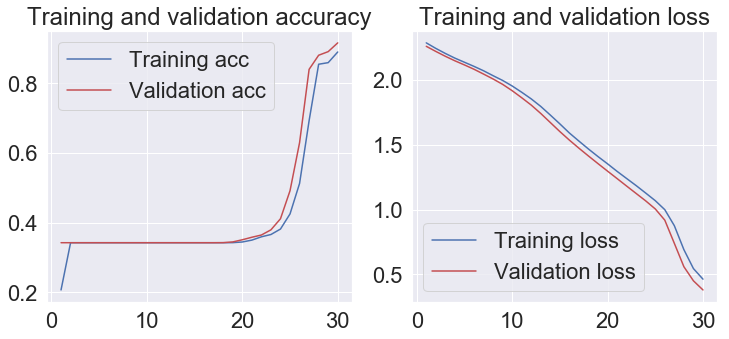

In [101]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
history = model.fit(sentences_train, y_train,
                    epochs=30,
                    verbose=1,
                    validation_data=(sentences_train, y_train),
                    batch_size=1024, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001), 
                                ModelCheckpoint('keras_model', 
                                 monitor='val_loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='auto') ])
loss, accuracy = model.evaluate(sentences_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(sentences_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [102]:
from keras.models import load_model

model = load_model('keras_model')

In [103]:
#model2 = load_model('keras_model')

In [104]:
preds = to_categorical(model.predict_classes(sentences_test))

In [105]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, log_loss, classification_report

print('Accuracy: ', accuracy_score(y_test, preds))
print('')
print(classification_report(y_test, preds))


print(confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1)))

Accuracy:  0.6650154798761609

              precision    recall  f1-score   support

           0       0.54      0.45      0.49        98
           1       0.67      0.20      0.31        98
           2       0.73      0.69      0.71       140
           3       0.59      0.69      0.64        91
           4       0.68      0.89      0.77       579
           5       0.76      0.34      0.47        90
           6       0.41      0.46      0.43        98
           7       0.79      0.73      0.76       237
           8       0.85      0.72      0.78       103
           9       0.28      0.17      0.21        81

   micro avg       0.67      0.67      0.67      1615
   macro avg       0.63      0.53      0.56      1615
weighted avg       0.66      0.67      0.65      1615
 samples avg       0.67      0.67      0.67      1615

[[ 44   0   2   5  22   0   7  12   1   5]
 [  4  20   2   6  45   2   9   6   1   3]
 [  2   0  96   3  30   0   6   1   2   0]
 [  1   0   3  63  14   0  

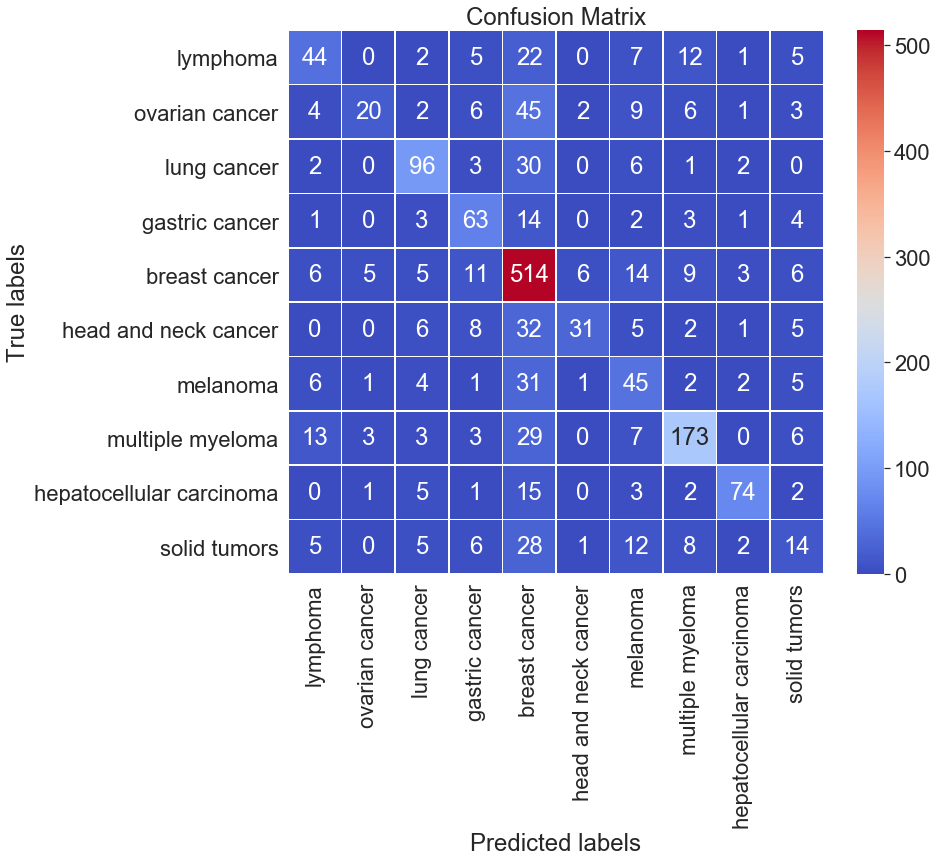

In [106]:
sns.set(rc={'figure.figsize':(12,10)}, font_scale=2)
ax= plt.subplot()
cm = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))
sns.heatmap(cm, annot=True, ax = ax, fmt='g', linewidths=.5, cmap='coolwarm'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(cancerType.tolist(), rotation=90); 
ax.yaxis.set_ticklabels(cancerType.tolist(), rotation=360);
#plt.xticks(rotation=90)
#plt.yticks(rotation=90)
plt.savefig('./image/Keras_Confusion_matrix.png', bbox_inches = "tight")

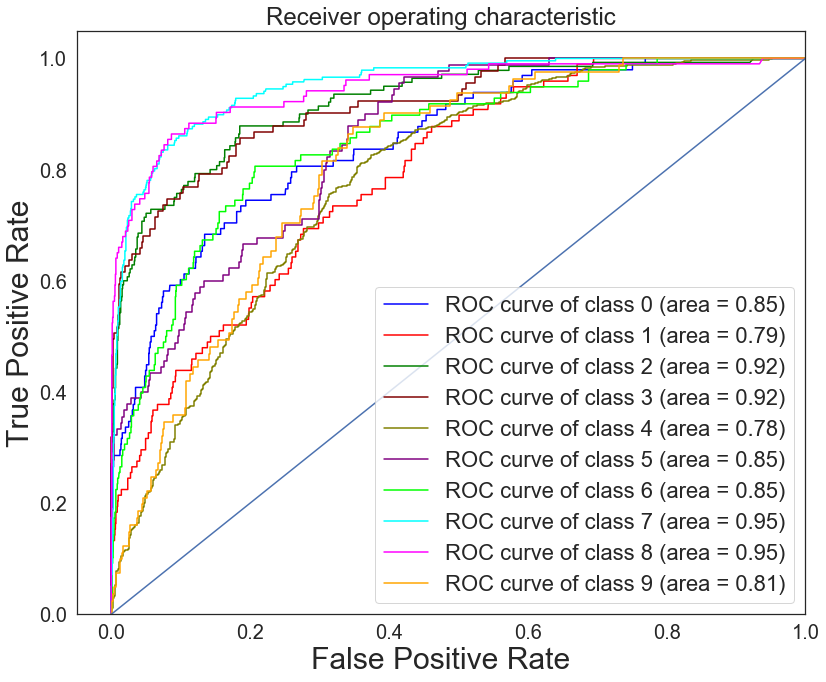

In [123]:
from sklearn.metrics import roc_curve, auc
sns.set_style("white")
preds = model.predict(sentences_test)

n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green','Maroon','Olive', 'Purple', 'Lime', 'Aqua','Fuchsia', 'Orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1])
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate',fontsize = 30)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.legend(cancerType.tolist(), loc="lower right")
plt.tight_layout()
plt.savefig('./image/ROC.png')
plt.show(); 

AttributeError: 'function' object has no attribute 'apply'

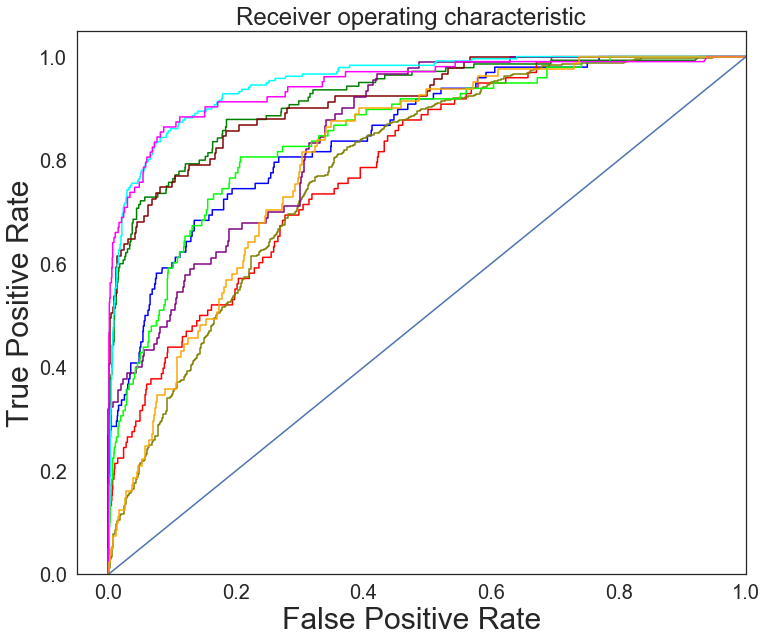

In [129]:
from sklearn.metrics import roc_curve, auc
sns.set_style("white")
preds = model.predict(sentences_test)

n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green','Maroon','Olive', 'Purple', 'Lime', 'Aqua','Fuchsia', 'Orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1])
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate',fontsize = 30)
plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
plt.legend('lambda n: for n in cancerType.tolist() (area = {1:0.2f})', loc="lower right")
plt.tight_layout()
plt.savefig('./image/ROC2.png')
plt.show(); 